In [1]:
import sys
sys.path.append("..")
import ScheduleFlow
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# create workload for large jobs
def create_jobs(num_procs, num_jobs, execution, submission):
    job_list = []

    for i in range(num_jobs):
        execution_time = np.random.randint(int(execution/2), execution*2)
        request_time = int(execution_time * (100+np.random.randint(0, 20)) / 100)
        processing_units = np.random.randint(1, num_procs + 1)
        submission_time = submission
        job_list.append(ScheduleFlow.Application(
            processing_units,
            submission_time,
            int(execution_time),
            [int(request_time)]))
    return job_list

In [3]:
# run the batch scheduler simulations with different amount of small jobs
df = pd.DataFrame(columns=["Small_jobs", "Utilization", "Response_time", "Scheduler"])
i = 0
procs = 10
simulator = ScheduleFlow.Simulator(check_correctness=True)
sch = ScheduleFlow.BatchScheduler(ScheduleFlow.System(procs),
                                  batch_size=100)
sch_online = ScheduleFlow.OnlineScheduler(ScheduleFlow.System(procs))
for loop in range(10):
    large_jobs = create_jobs(procs, 50, 100, 0)
    small_jobs = []

    for small_count in range(10, 210, 10):
        small_jobs += create_jobs(procs, 5, 8, 2)
        results = simulator.run_scenario(
            sch,
            large_jobs + small_jobs,
            metrics=["system utilization", "job response time"])
        df.loc[i] = [small_count, results['system utilization'],
                     results['job response time']/3600, "Batch"]
        i += 1
        results = simulator.run_scenario(
            sch_online,
            large_jobs + small_jobs,
            metrics=["system utilization", "job response time"])
        df.loc[i] = [small_count, results['system utilization'],
                     results['job response time']/3600, "Online"]
        i += 1

df.head(6)

,Small_jobs,Utilization,Response_time,Scheduler
0,10,0.852995,0.765293,Batch
1,10,0.907989,0.710182,Online
2,20,0.856858,0.763185,Batch
3,20,0.909127,0.721519,Online
4,30,0.863419,0.735615,Batch
5,30,0.911209,0.733402,Online


Text(0, 0.5, 'Utilization')

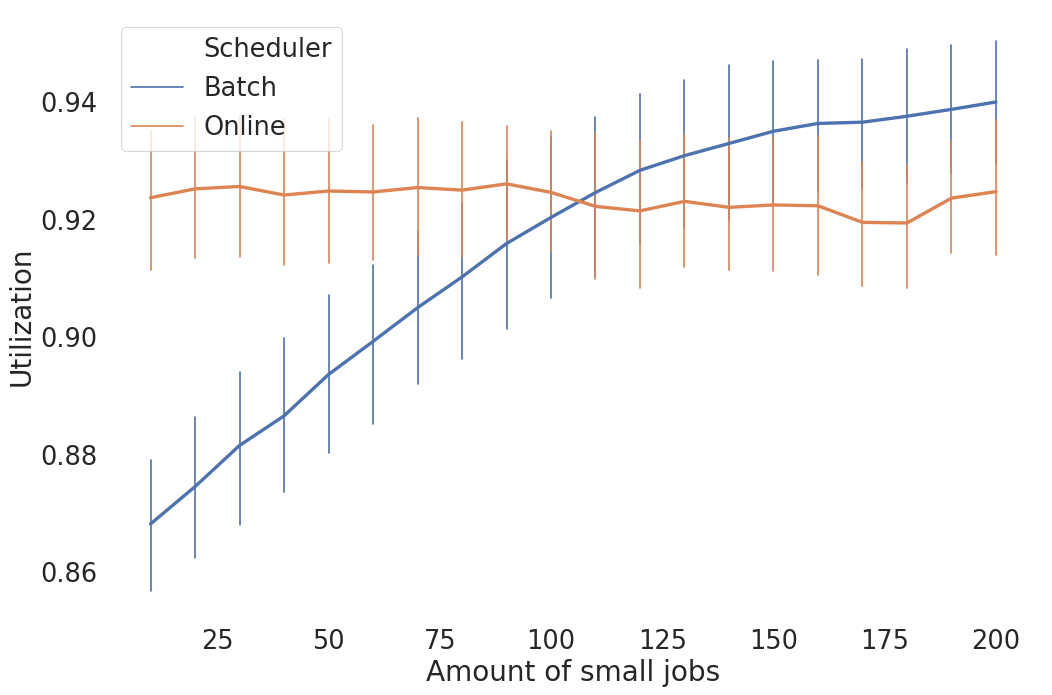

In [4]:
#plot utilization

fig = plt.figure(figsize=(15,10), dpi=80)  
sns.set(rc={'axes.facecolor':'#ffffff'}, font_scale=2.1)

ax = sns.lineplot(y="Utilization", x="Small_jobs", markers=True,
                  dashes=False, linewidth=3, hue="Scheduler",
                  err_style="bars", data=df)
plt.xlabel("Amount of small jobs")
plt.ylabel("Utilization")

Text(0, 0.5, 'Average job response time (hours)')

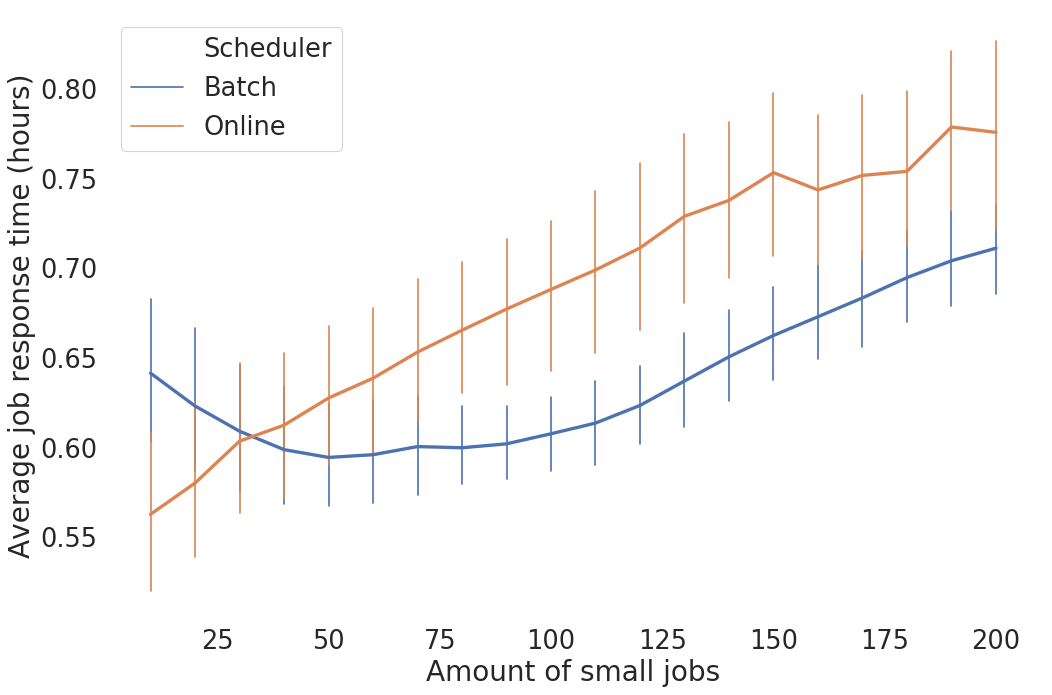

In [5]:
#plot response time

fig = plt.figure(figsize=(15,10), dpi=80)  
sns.set(rc={'axes.facecolor':'#ffffff'}, font_scale=2.1)

ax = sns.lineplot(y="Response_time", x="Small_jobs", markers=True,
                  dashes=False, linewidth=3, hue="Scheduler",
                  err_style="bars", data=df)
plt.xlabel("Amount of small jobs")
plt.ylabel("Average job response time (hours)")